In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeClassifier, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import make_pipeline

In [2]:
df=pd.read_csv("MetroPT3(AirCompressor).csv")

In [3]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
df.shape

(1516948, 17)

In [5]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.drop(['timestamp'],axis=1,inplace=True)

In [7]:
df.skew().sort_values(ascending=True)

Pressure_switch   -1.066710e+01
Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -1.764960e+00
Reservoirs        -8.861544e-01
TP3               -8.773494e-01
Oil_temperature   -4.579052e-02
Unnamed: 0         7.691699e-17
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.986279e+00
DV_pressure        5.720572e+00
LPS                1.701175e+01
dtype: float64

As the data is highly skewed, we will proceed to remove it using IQR method.

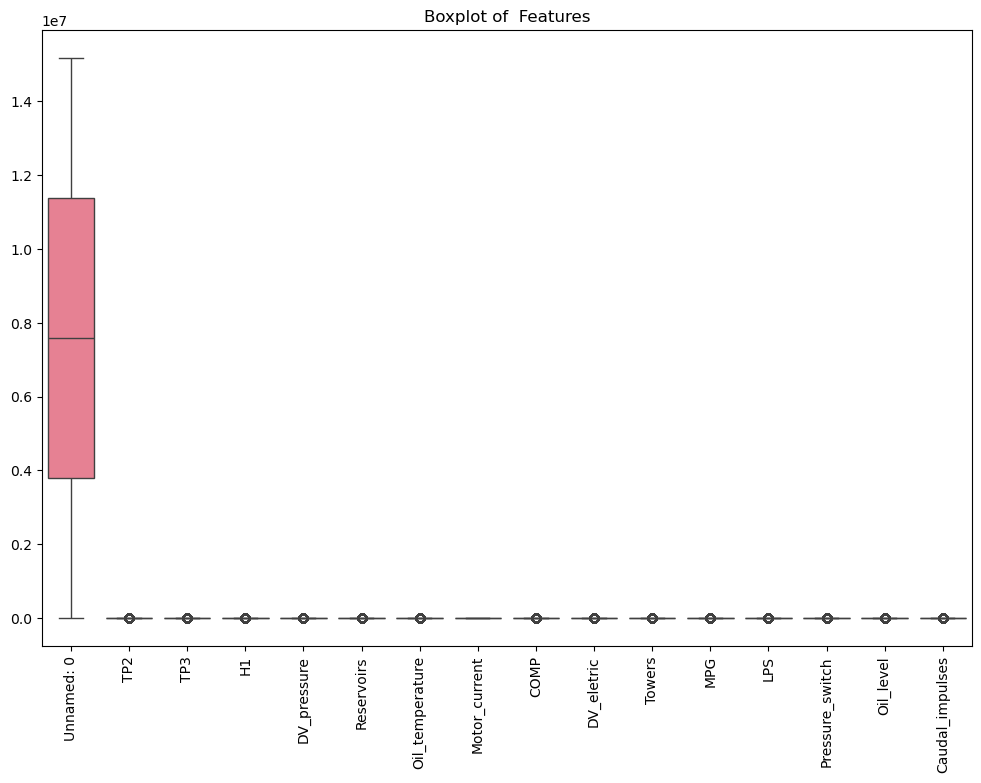

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [10]:
has_negatives = (df < 0).any().any()
print("DataFrame contains negative values:", has_negatives)

neg_cols = df.columns[(df < 0).any()]
print("Columns with negatives:", list(neg_cols))

DataFrame contains negative values: True
Columns with negatives: ['TP2', 'H1', 'DV_pressure']


In [11]:
# def remove_outliers(data,columns):
#   data_filtered=df.copy()

#   for column in columns:
#      Q1 = data[column].quantile(0.25)
#      Q3 = data[column].quantile(0.75)
#      IQR = Q3 - Q1

#      lower_bound = Q1 - 1.5 * IQR
#      upper_bound = Q3 + 1.5* IQR

#      data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

#   return data_filtered

In [12]:
# new_df=remove_outliers(df,['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses'])

In [13]:
pt = PowerTransformer(method='yeo-johnson')

for col in df.columns:
    if df[col].skew() < -0.5:
        df[col] = pt.fit_transform(df[[col]]).flatten()

print(df.skew().sort_values(ascending=True))

Pressure_switch   -1.066710e+01
Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -1.449794e+00
Oil_temperature   -4.579052e-02
Unnamed: 0         7.691699e-17
Reservoirs         4.235125e-02
TP3                4.270272e-02
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.986279e+00
DV_pressure        5.720572e+00
LPS                1.701175e+01
dtype: float64


In [14]:
def cap_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    df_capped = df.copy()
    
    for column in columns:
        lower_bound = df_capped[column].quantile(lower_quantile)
        upper_bound = df_capped[column].quantile(upper_quantile)
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped

columns_to_cap = ['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature',
                 'COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch',
                 'Oil_level','Caudal_impulses']

new_df = cap_outliers(df, columns_to_cap)

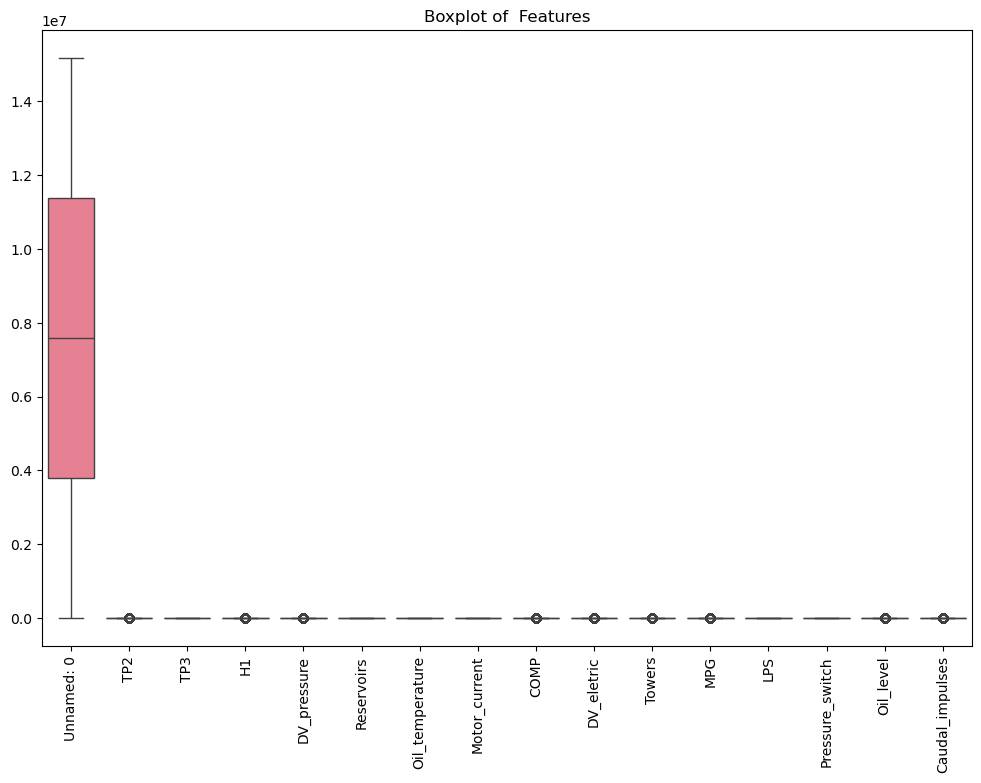

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(new_df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [16]:
new_df.skew().sort_values(ascending=True)

Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -1.451617e+00
LPS                0.000000e+00
Pressure_switch    0.000000e+00
Unnamed: 0         7.691699e-17
Oil_temperature    1.867301e-02
Reservoirs         2.798168e-01
TP3                2.809975e-01
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.985080e+00
DV_pressure        5.039557e+00
dtype: float64

In [17]:
new_df.shape

(1516948, 16)

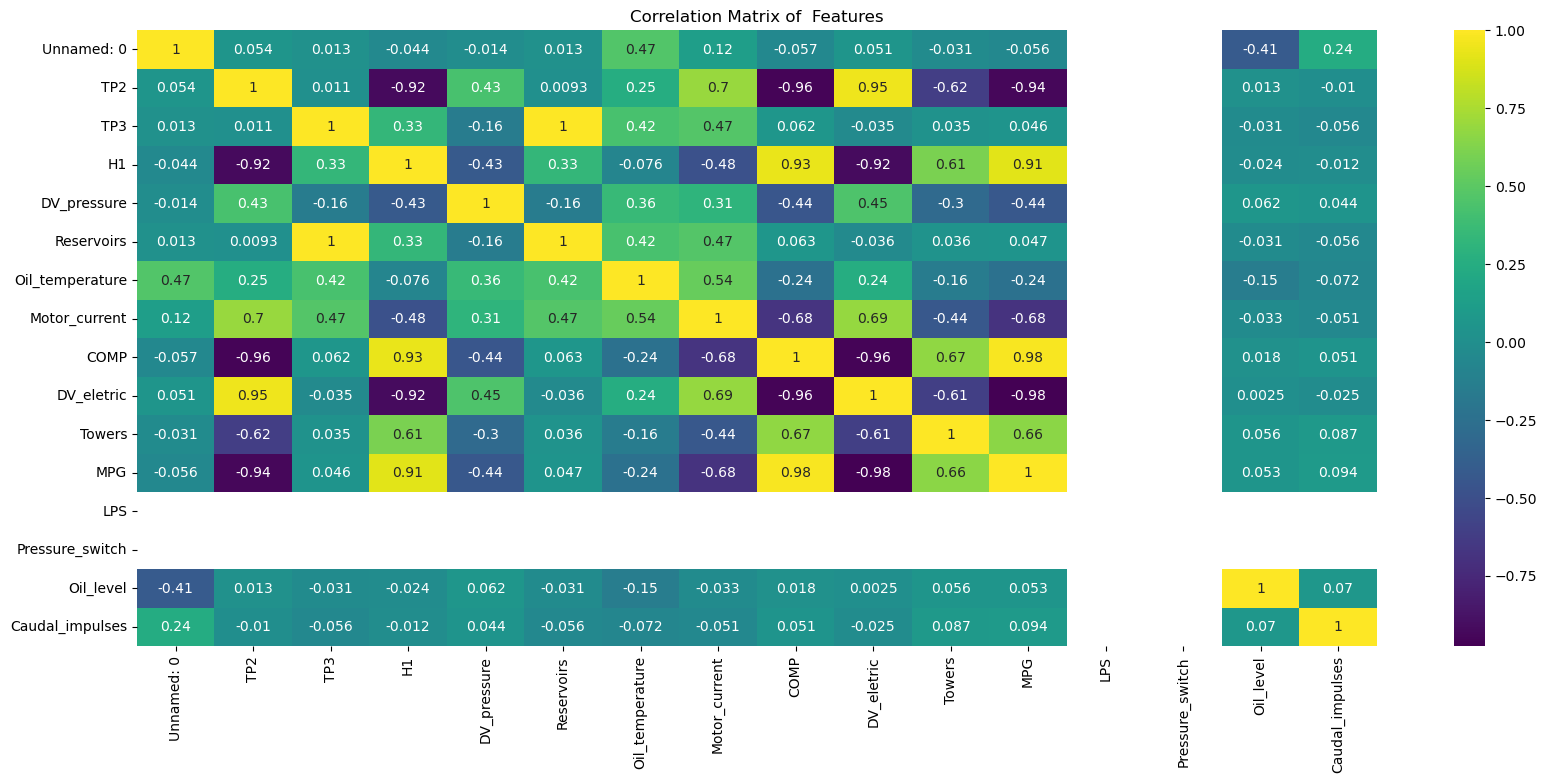

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(new_df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

In [19]:
X = new_df.drop(columns=['Caudal_impulses'])
y = new_df['Caudal_impulses']

select_k = SelectKBest(score_func=f_classif, k=11)  #based on the ANOVA F-value, selecting top k features
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()] # to find scores of all features

print("Selected Features:", selected_features)
print("Feature Scores based on select_k:", selected_scores)


# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})


# Sort by scores in ascending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print results
print("Selected Features:\n", feature_scores_df)

Selected Features: Index(['Unnamed: 0', 'TP3', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'Oil_level'],
      dtype='object')
Feature Scores based on select_k: [92026.07034413  4851.70909204  2947.21502536  4697.12236877
  7911.31201708  3978.4248924   3913.22461465   964.08677777
 11626.75865442 13667.80895226  7525.34941386]
Selected Features:
             Feature         Score
0        Unnamed: 0  92026.070344
9               MPG  13667.808952
8            Towers  11626.758654
4   Oil_temperature   7911.312017
10        Oil_level   7525.349414
1               TP3   4851.709092
3        Reservoirs   4697.122369
5     Motor_current   3978.424892
6              COMP   3913.224615
2       DV_pressure   2947.215025
7        DV_eletric    964.086778


In [20]:
new_df.rename(columns={'Unnamed: 0': 'SN_no'}, inplace=True)

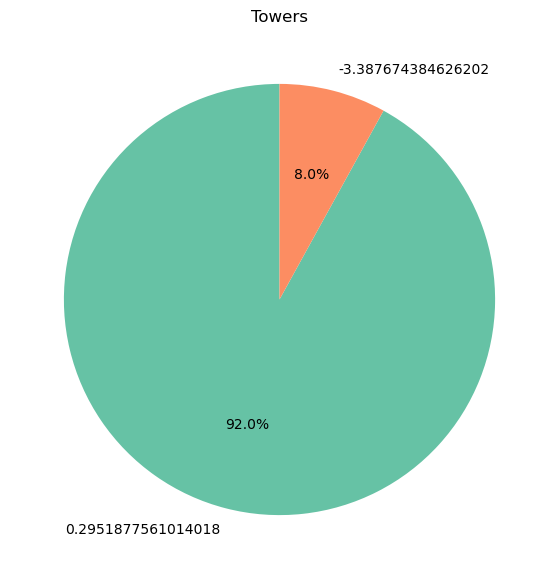

In [21]:
plt.figure(figsize=(7, 7))
new_df['Towers'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Towers")
plt.ylabel("")  
plt.show()

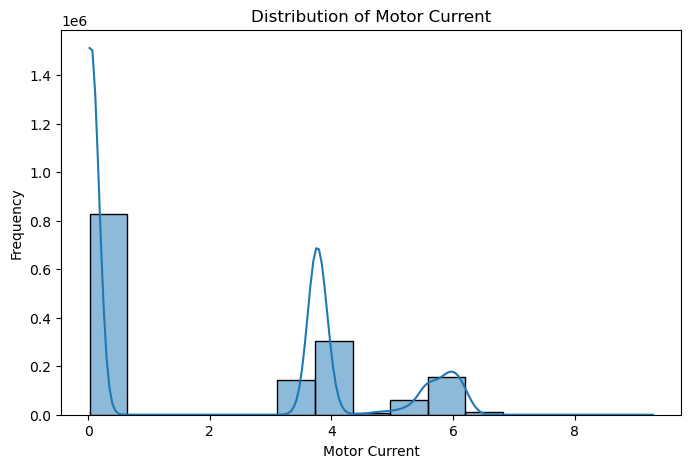

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(new_df['Motor_current'], bins=15, kde=True)
plt.title('Distribution of Motor Current')
plt.xlabel('Motor Current')
plt.ylabel('Frequency')
plt.show()

This figure shows where the majority of the motor current lies.

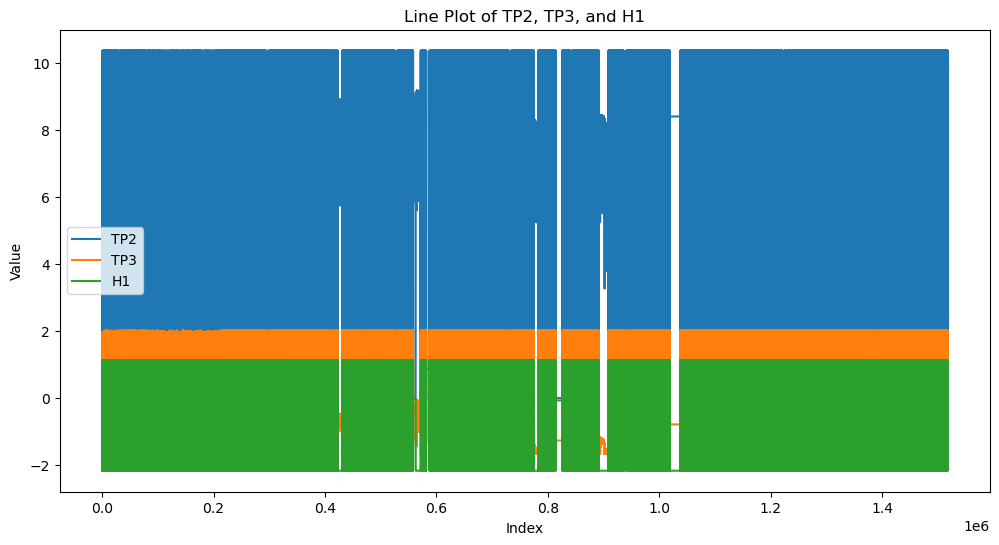

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(new_df['TP2'], label='TP2')
plt.plot(new_df['TP3'], label='TP3')
plt.plot(new_df['H1'], label='H1')
plt.title('Line Plot of TP2, TP3, and H1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

It shows how the values of TP2, TP3 and H1 changes over time

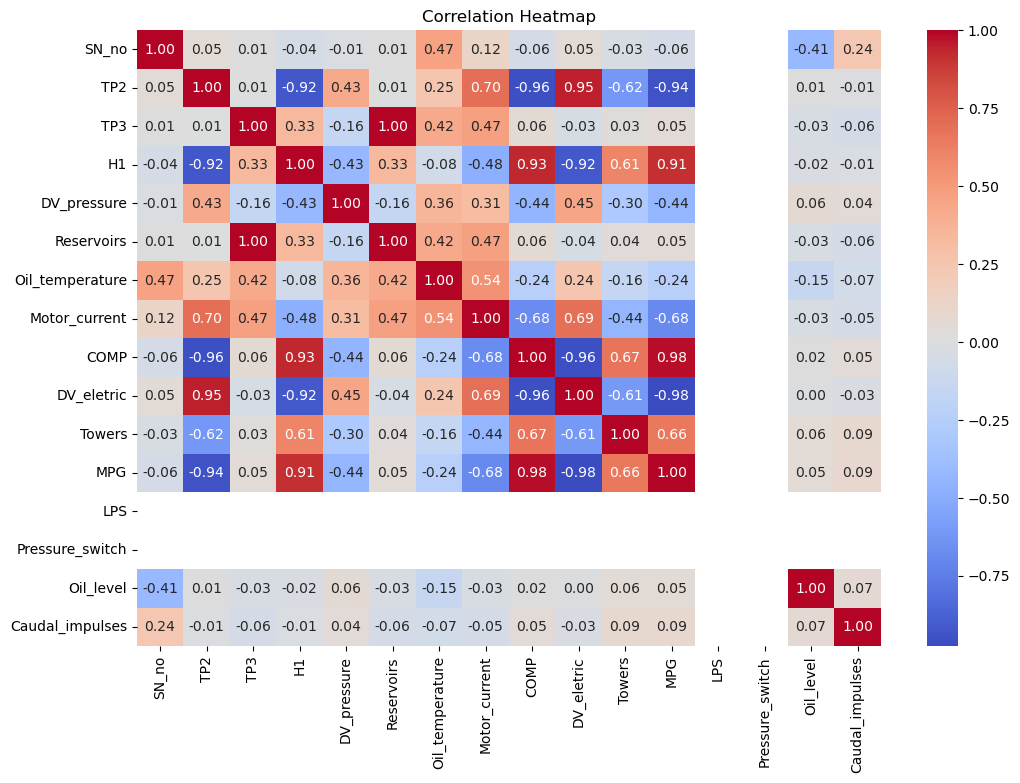

In [26]:
plt.figure(figsize=(12, 8))
corr = new_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the heatmap we can see that TP2 and reservoirs have a correlation.

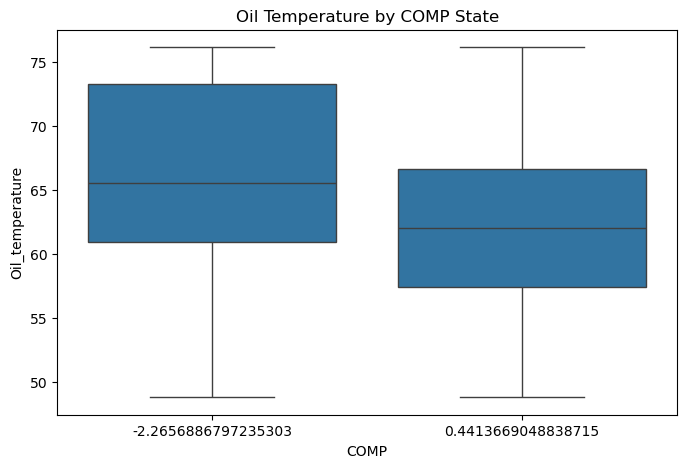

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='COMP', y='Oil_temperature', data=new_df)
plt.title('Oil Temperature by COMP State')
plt.show()

This is showing the oil temperature based on the COMP state that is 1 or 0.

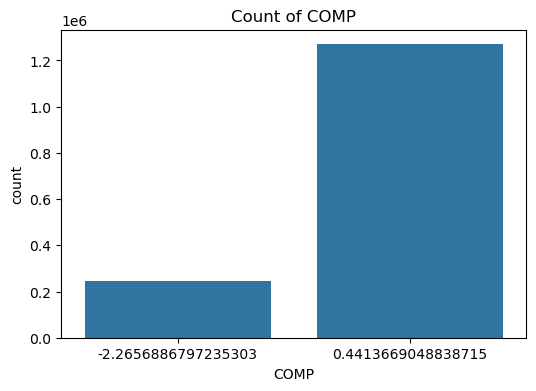

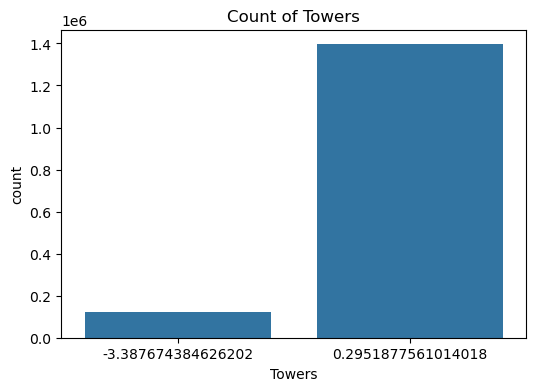

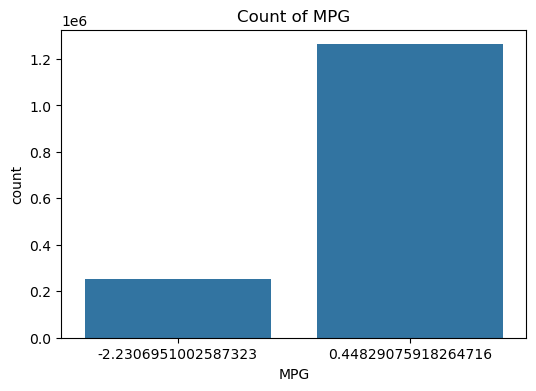

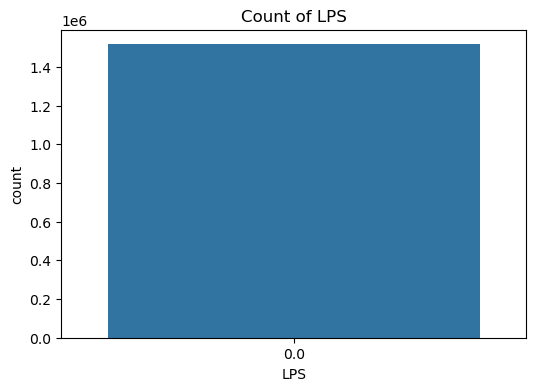

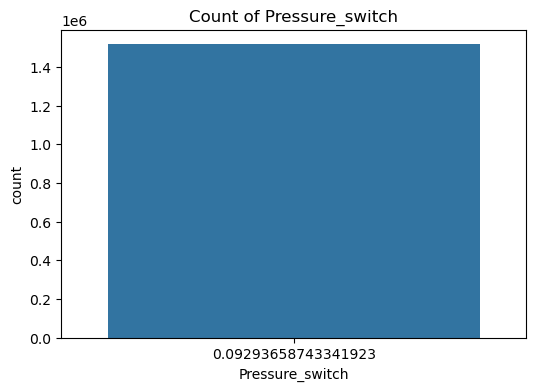

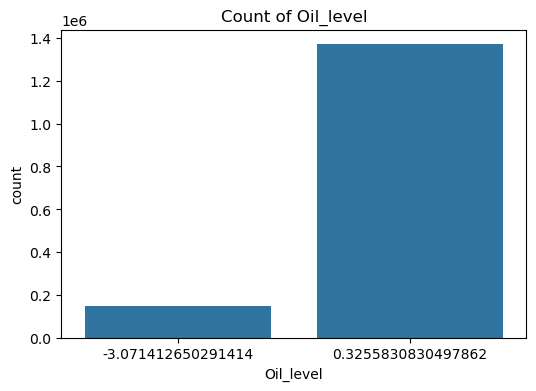

In [30]:
categorical_cols = ['COMP', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=new_df)
    plt.title(f'Count of {col}')
    plt.show()

Here it is just showing the frequency of each unique value in the specified column.

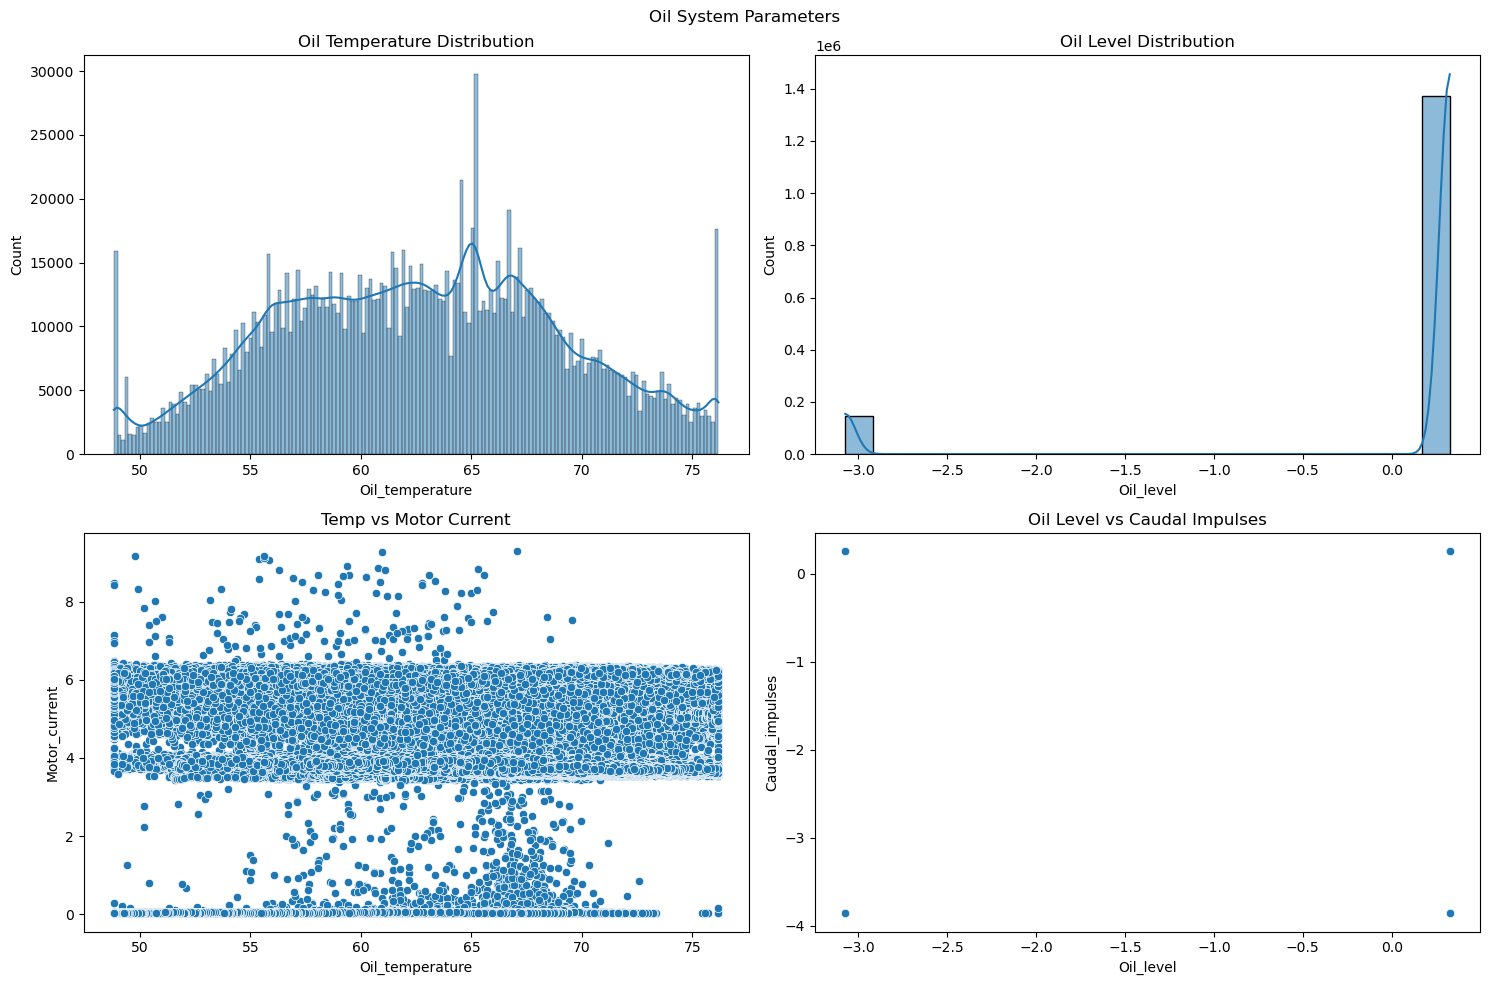

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Oil System Parameters')

sns.histplot(data=new_df, x='Oil_temperature', kde=True, ax=axes[0,0])
axes[0,0].set_title('Oil Temperature Distribution')
sns.histplot(data=new_df, x='Oil_level', kde=True, ax=axes[0,1])
axes[0,1].set_title('Oil Level Distribution')
sns.scatterplot(data=new_df, x='Oil_temperature', y='Motor_current', ax=axes[1,0])
axes[1,0].set_title('Temp vs Motor Current')
sns.scatterplot(data=new_df, x='Oil_level', y='Caudal_impulses', ax=axes[1,1])
axes[1,1].set_title('Oil Level vs Caudal Impulses')

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

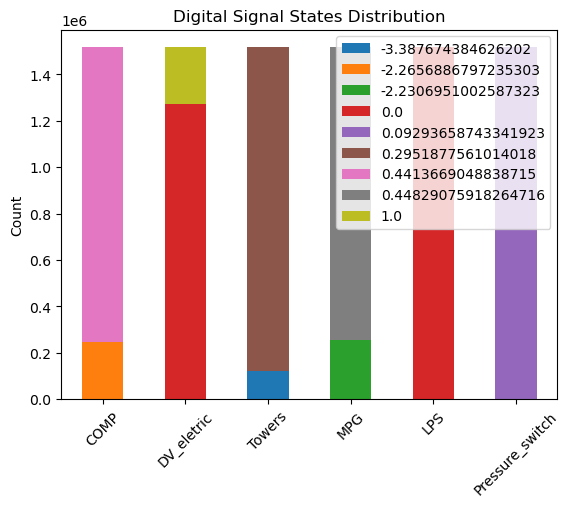

In [33]:
digital_cols = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch']
plt.figure(figsize=(15, 5))
new_df[digital_cols].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True)
plt.title('Digital Signal States Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
select_k = SelectKBest(score_func=f_classif, k=3)  
X_selected = select_k.fit_transform(X, y)
print("Selected Features:", X.columns[select_k.get_support()])

Selected Features: Index(['Unnamed: 0', 'Towers', 'MPG'], dtype='object')


In [35]:
X = new_df[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 
       'Oil_temperature', 'Motor_current', 'COMP', 
       'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch']]
y = new_df['Oil_level']

# we are predicting for oil changes like leaks and consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
linreg = make_pipeline(StandardScaler(), LinearRegression())
linreg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [37]:
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.86
R-squared (R²): 0.14
Mean Absolute Error (MAE): 0.52


In [38]:
#pip install --upgrade ipykernel

In [74]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [80]:
y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.78
R-squared (R²): 0.22
Mean Absolute Error (MAE): 0.49


In [78]:
rf = RandomForestRegressor(random_state=42)  
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.79
R-squared (R²): 0.21
Mean Absolute Error (MAE): 0.42
